# Analisis Deteksi SYN Flood Menggunakan RTT

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_bersih = pd.read_csv('data_bersih.csv')
df_flood = pd.read_csv('data_flood.csv')

In [3]:
df_bersih.head()

,no,min,avg,max,mdev,transmitted,received,loss,time (ms)
0,1,0.179,0.439,0.999,0.230,100,100,0,104
1,2,0.168,0.398,0.989,0.201,100,100,0,210
2,3,0.200,0.407,1.041,0.214,100,100,0,180
3,4,0.197,0.422,1.064,0.204,100,100,0,261
4,5,0.167,0.479,1.342,0.262,100,100,0,1007


In [4]:
df_flood.head()

,no,min,avg,max,mdev,transmitted,received,loss,time (ms)
0,1,0.109,36.342,75.005,11.125,100,91,9,391
1,2,0.132,35.699,45.566,10.134,100,84,16,570
2,3,0.125,39.660,69.185,11.157,100,88,12,517
3,4,0.103,38.395,54.863,11.264,100,84,16,536
4,5,0.074,36.524,60.682,15.214,100,93,7,519


In [5]:
df_bersih.info(), df_flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           100 non-null    int64  
 1   min          100 non-null    float64
 2   avg          100 non-null    float64
 3   max          100 non-null    float64
 4   mdev         100 non-null    float64
 5   transmitted  100 non-null    int64  
 6   received     100 non-null    int64  
 7   loss         100 non-null    int64  
 8   time (ms)    100 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 7.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           100 non-null    int64  
 1   min          100 non-null    float64
 2   avg          100 non-null    float64
 3   max          100 non-null    float64
 4   mdev         100 non-null

(None, None)

In [6]:
df_bersih.shape, df_flood.shape

((100, 9), (100, 9))

In [7]:
dbersih = df_bersih.drop(columns=['no'])
dflood = df_flood.drop(columns=['no'])

In [8]:
dbersih.head()

,min,avg,max,mdev,transmitted,received,loss,time (ms)
0,0.179,0.439,0.999,0.230,100,100,0,104
1,0.168,0.398,0.989,0.201,100,100,0,210
2,0.200,0.407,1.041,0.214,100,100,0,180
3,0.197,0.422,1.064,0.204,100,100,0,261
4,0.167,0.479,1.342,0.262,100,100,0,1007


In [9]:
dbersih.describe()

,min,avg,max,mdev,transmitted,received,loss,time (ms)
count,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.000000
mean,0.193570,0.372470,1.003010,0.153300,100.0,100.0,0.0,386.310000
std,0.024455,0.044568,0.276924,0.062211,0.0,0.0,0.0,209.229838
min,0.138000,0.281000,0.331000,0.039000,100.0,100.0,0.0,104.000000
25%,0.177000,0.341000,0.921750,0.096000,100.0,100.0,0.0,254.000000
50%,0.191000,0.365000,1.024000,0.160500,100.0,100.0,0.0,375.000000
75%,0.209000,0.407250,1.111250,0.207000,100.0,100.0,0.0,460.250000
max,0.268000,0.481000,2.517000,0.286000,100.0,100.0,0.0,1074.000000


In [10]:
dflood.describe()

,min,avg,max,mdev,transmitted,received,loss,time (ms)
count,100.000000,100.000000,100.000000,100.000000,100.0,100.00000,100.00000,100.000000
mean,0.342380,34.621940,57.896150,13.784680,100.0,91.14000,8.86000,460.680000
std,0.704565,3.703161,9.708182,2.879316,0.0,3.80595,3.80595,67.629394
min,0.057000,25.528000,45.566000,6.590000,100.0,80.00000,3.00000,307.000000
25%,0.098000,32.027500,50.891750,11.415500,100.0,88.00000,6.00000,417.000000
50%,0.120500,35.865500,54.869000,13.979000,100.0,92.00000,8.00000,460.500000
75%,0.217000,37.557500,61.494000,16.305500,100.0,94.00000,12.00000,506.250000
max,4.813000,40.347000,90.486000,18.567000,100.0,97.00000,20.00000,650.000000


## Comparing The Datasets

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [12]:
# plt.style.use('seaborn-whitegrid')
# plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-pastel')
# plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')

## DF_MIN

In [13]:
df_min = pd.DataFrame({'no':df_bersih['no'], 'min1':df_bersih['min'], 'min2': df_flood['min']})

In [14]:
df_min

,no,min1,min2
0,1,0.179,0.109
1,2,0.168,0.132
2,3,0.200,0.125
3,4,0.197,0.103
4,5,0.167,0.074
...,...,...,...
95,96,0.268,0.144
96,97,0.207,0.675
97,98,0.231,0.679
98,99,0.185,0.133


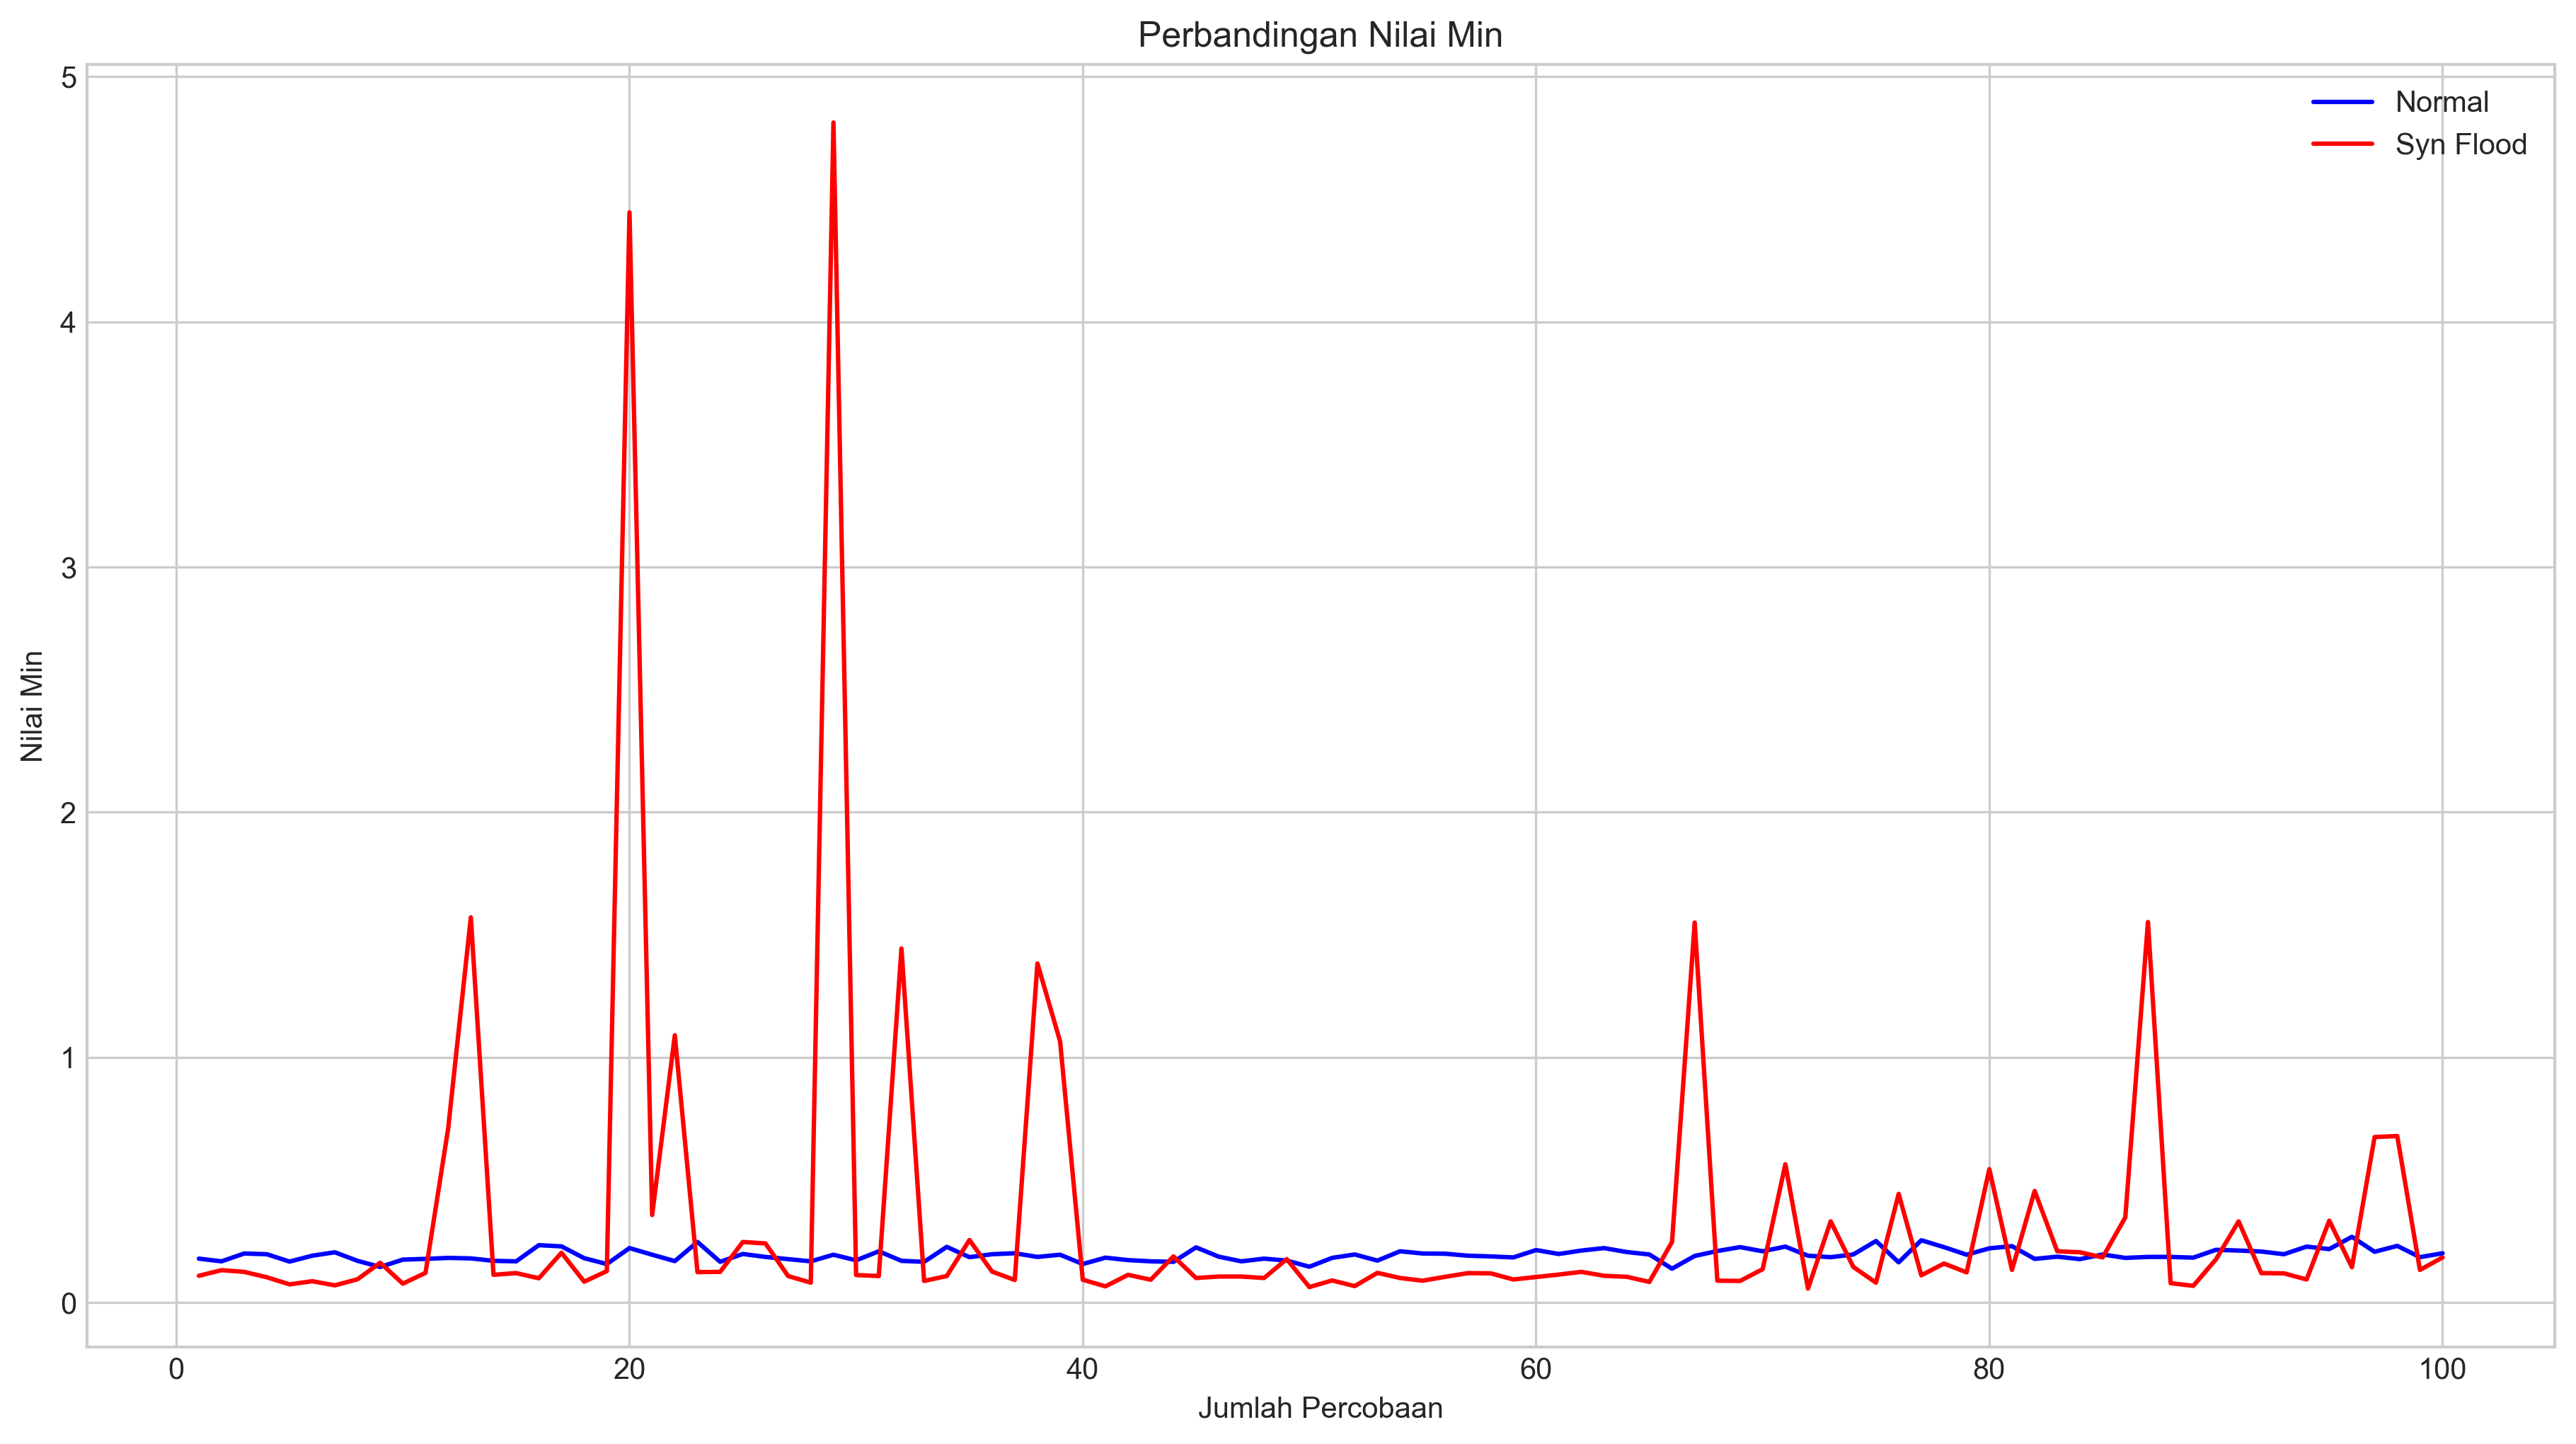

In [15]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
df_min.plot(kind='line', 
            x='no', 
            y=['min1','min2'], 
            color=['blue','red'],
            ax=ax)
plt.xlabel('Jumlah Percobaan')
plt.ylabel('Nilai Min')
plt.title('Perbandingan Nilai Min')
plt.legend(['Normal','Syn Flood'])

## DF_AVG

In [16]:
df_avg = pd.DataFrame({'no':df_bersih['no'], 'avg1':df_bersih['avg'], 'avg2': df_flood['avg']})

In [17]:
df_avg.head()

,no,avg1,avg2
0,1,0.439,36.342
1,2,0.398,35.699
2,3,0.407,39.660
3,4,0.422,38.395
4,5,0.479,36.524


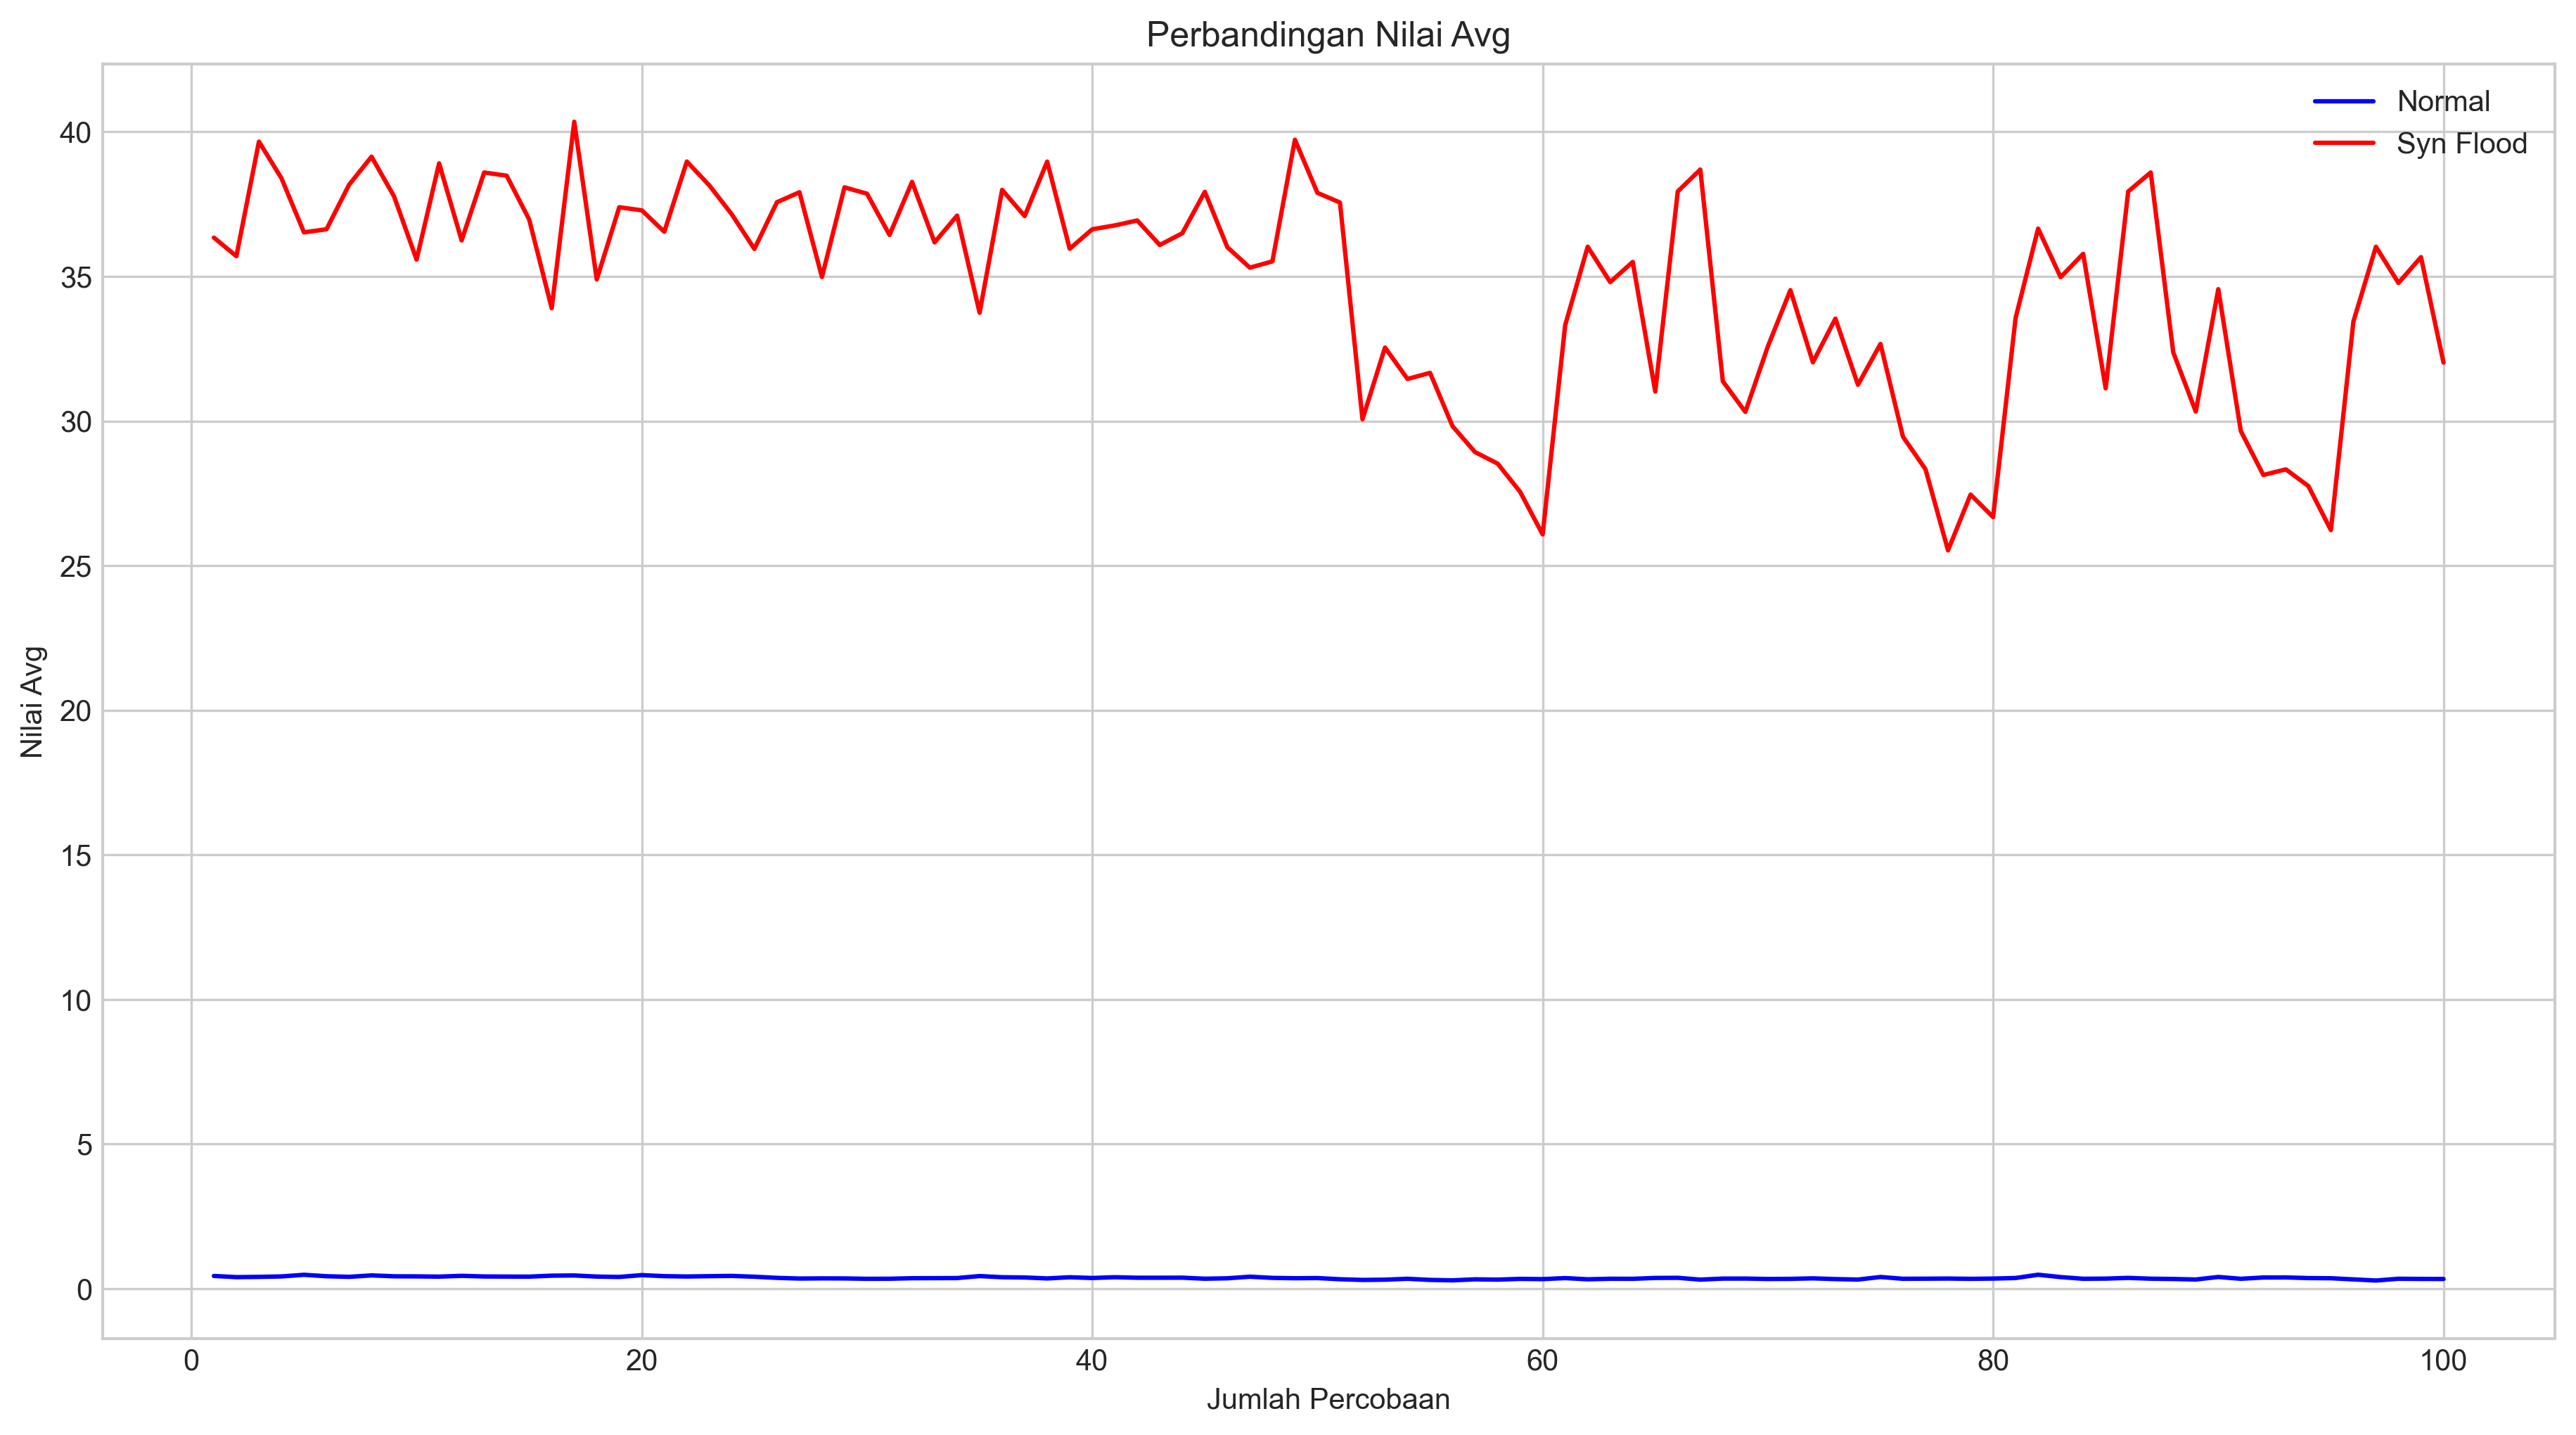

In [18]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
df_avg.plot(kind='line',
            x='no',
            y=['avg1', 'avg2'],
            color=['blue', 'red'],
            ax=ax)
plt.xlabel('Jumlah Percobaan')
plt.ylabel('Nilai Avg')
plt.title('Perbandingan Nilai Avg')
plt.legend(['Normal','Syn Flood'])

## DF_MAX

In [19]:
df_max = pd.DataFrame({'no':df_bersih['no'], 'max1':df_bersih['max'], 'max2': df_flood['max']})

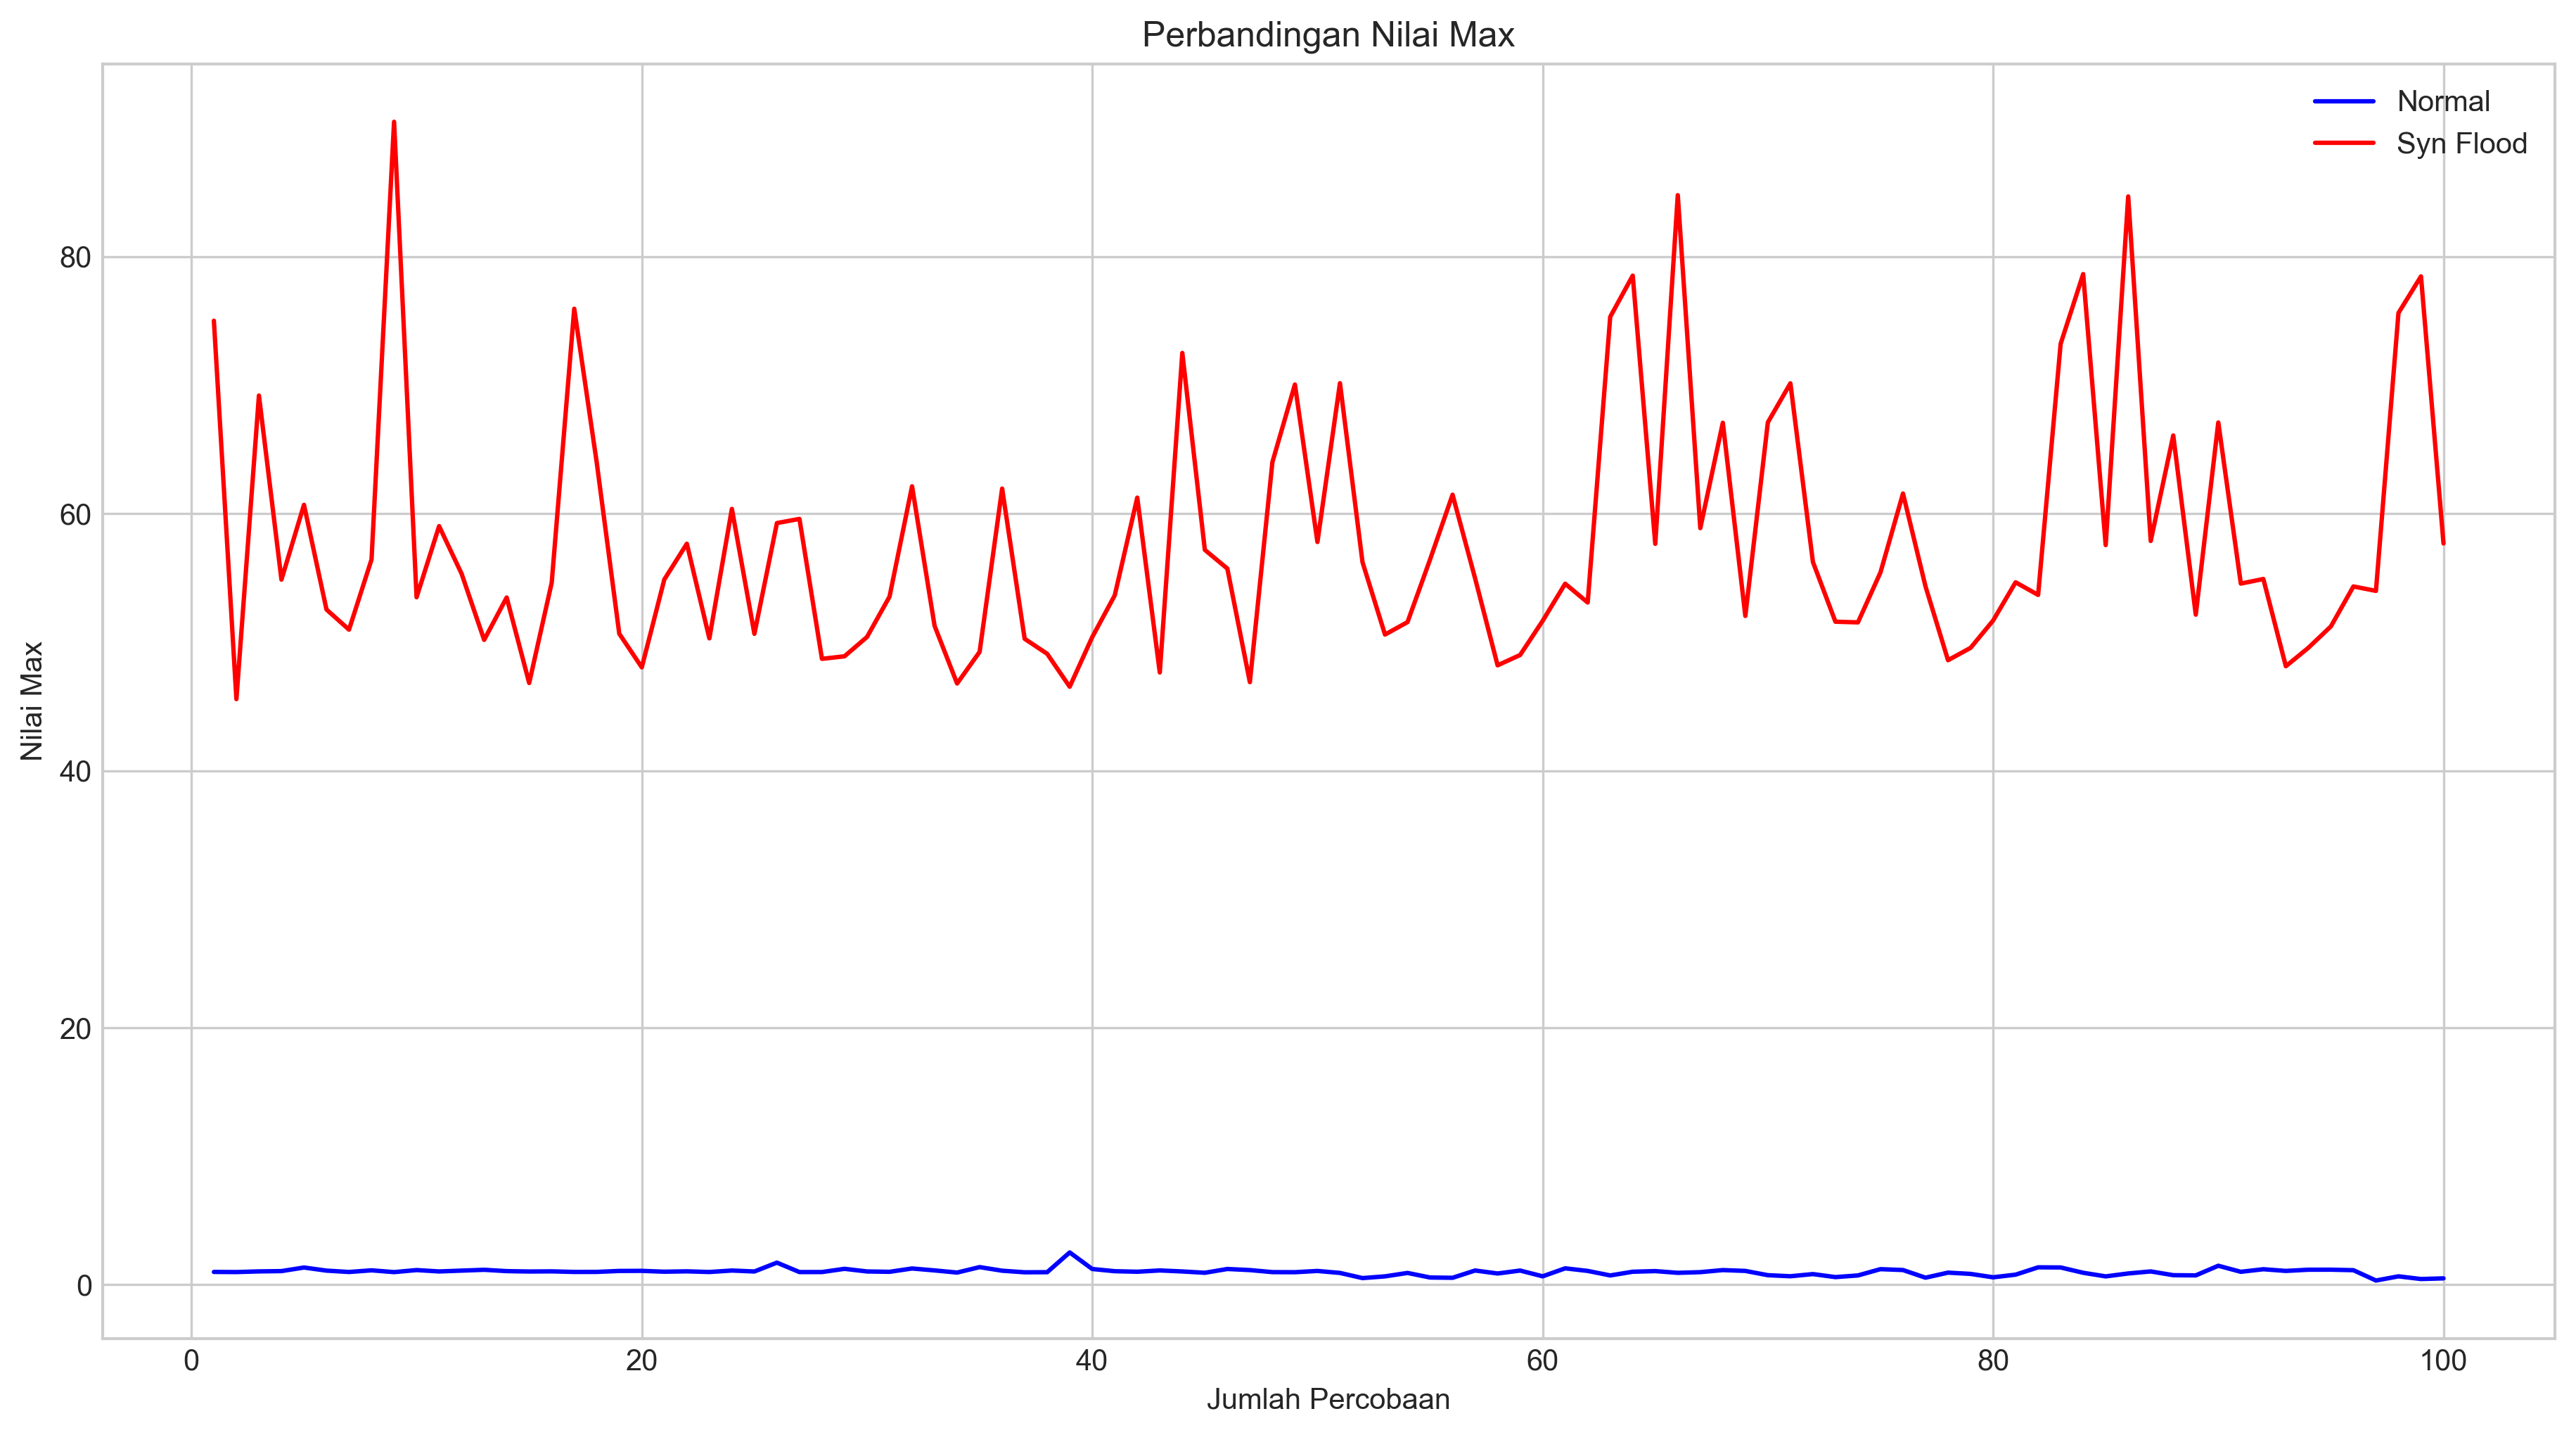

In [20]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
df_max.plot(kind='line',
            x='no',
            y=['max1', 'max2'],
            color=['blue', 'red'],
            ax=ax)
plt.xlabel('Jumlah Percobaan')
plt.ylabel('Nilai Max')
plt.title('Perbandingan Nilai Max')
plt.legend(['Normal','Syn Flood'])

## DF_MDEV

In [21]:
df_mdev = pd.DataFrame({'no':df_bersih['no'], 'mdev1':df_bersih['mdev'], 'mdev2': df_flood['mdev']})

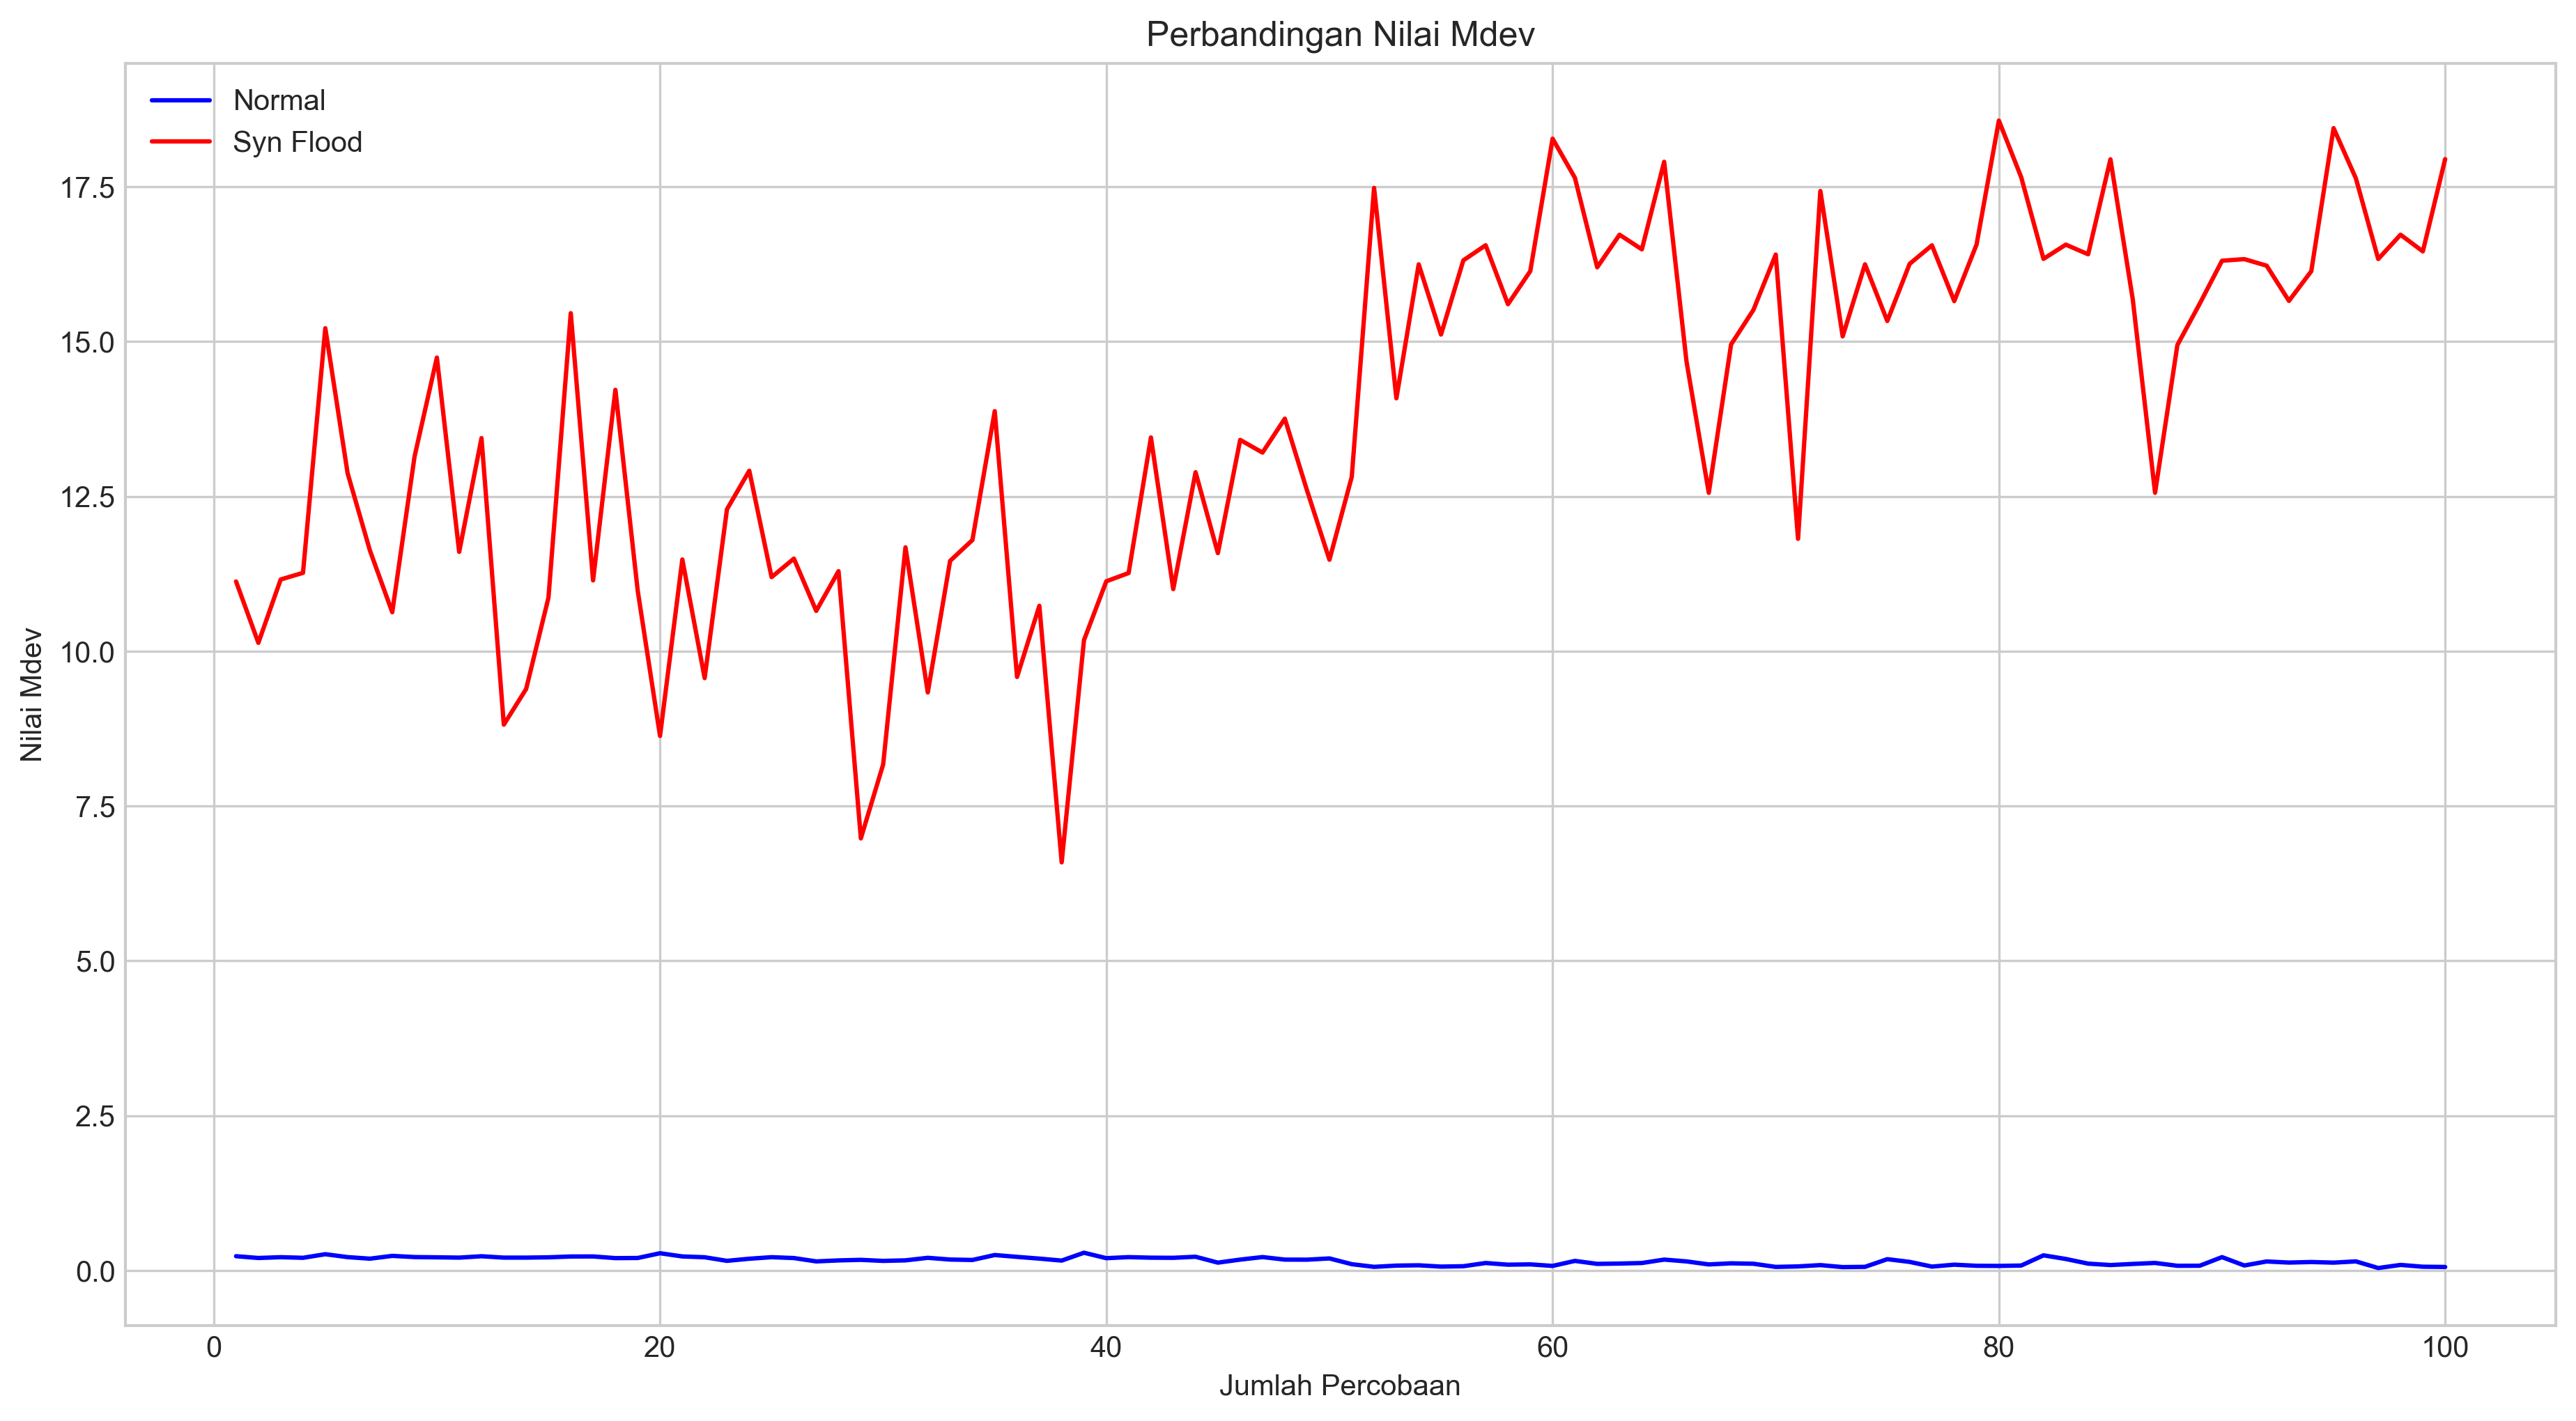

In [22]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
df_mdev.plot(kind='line',
            x='no',
            y=['mdev1', 'mdev2'],
            color=['blue', 'red'],
            ax=ax)
plt.xlabel('Jumlah Percobaan')
plt.ylabel('Nilai Mdev')
plt.title('Perbandingan Nilai Mdev')
plt.legend(['Normal','Syn Flood'])

## Time

In [23]:
df_time = pd.DataFrame({'no':df_bersih['no'], 'time1':df_bersih['time (ms)'], 'time2': df_flood['time (ms)']})

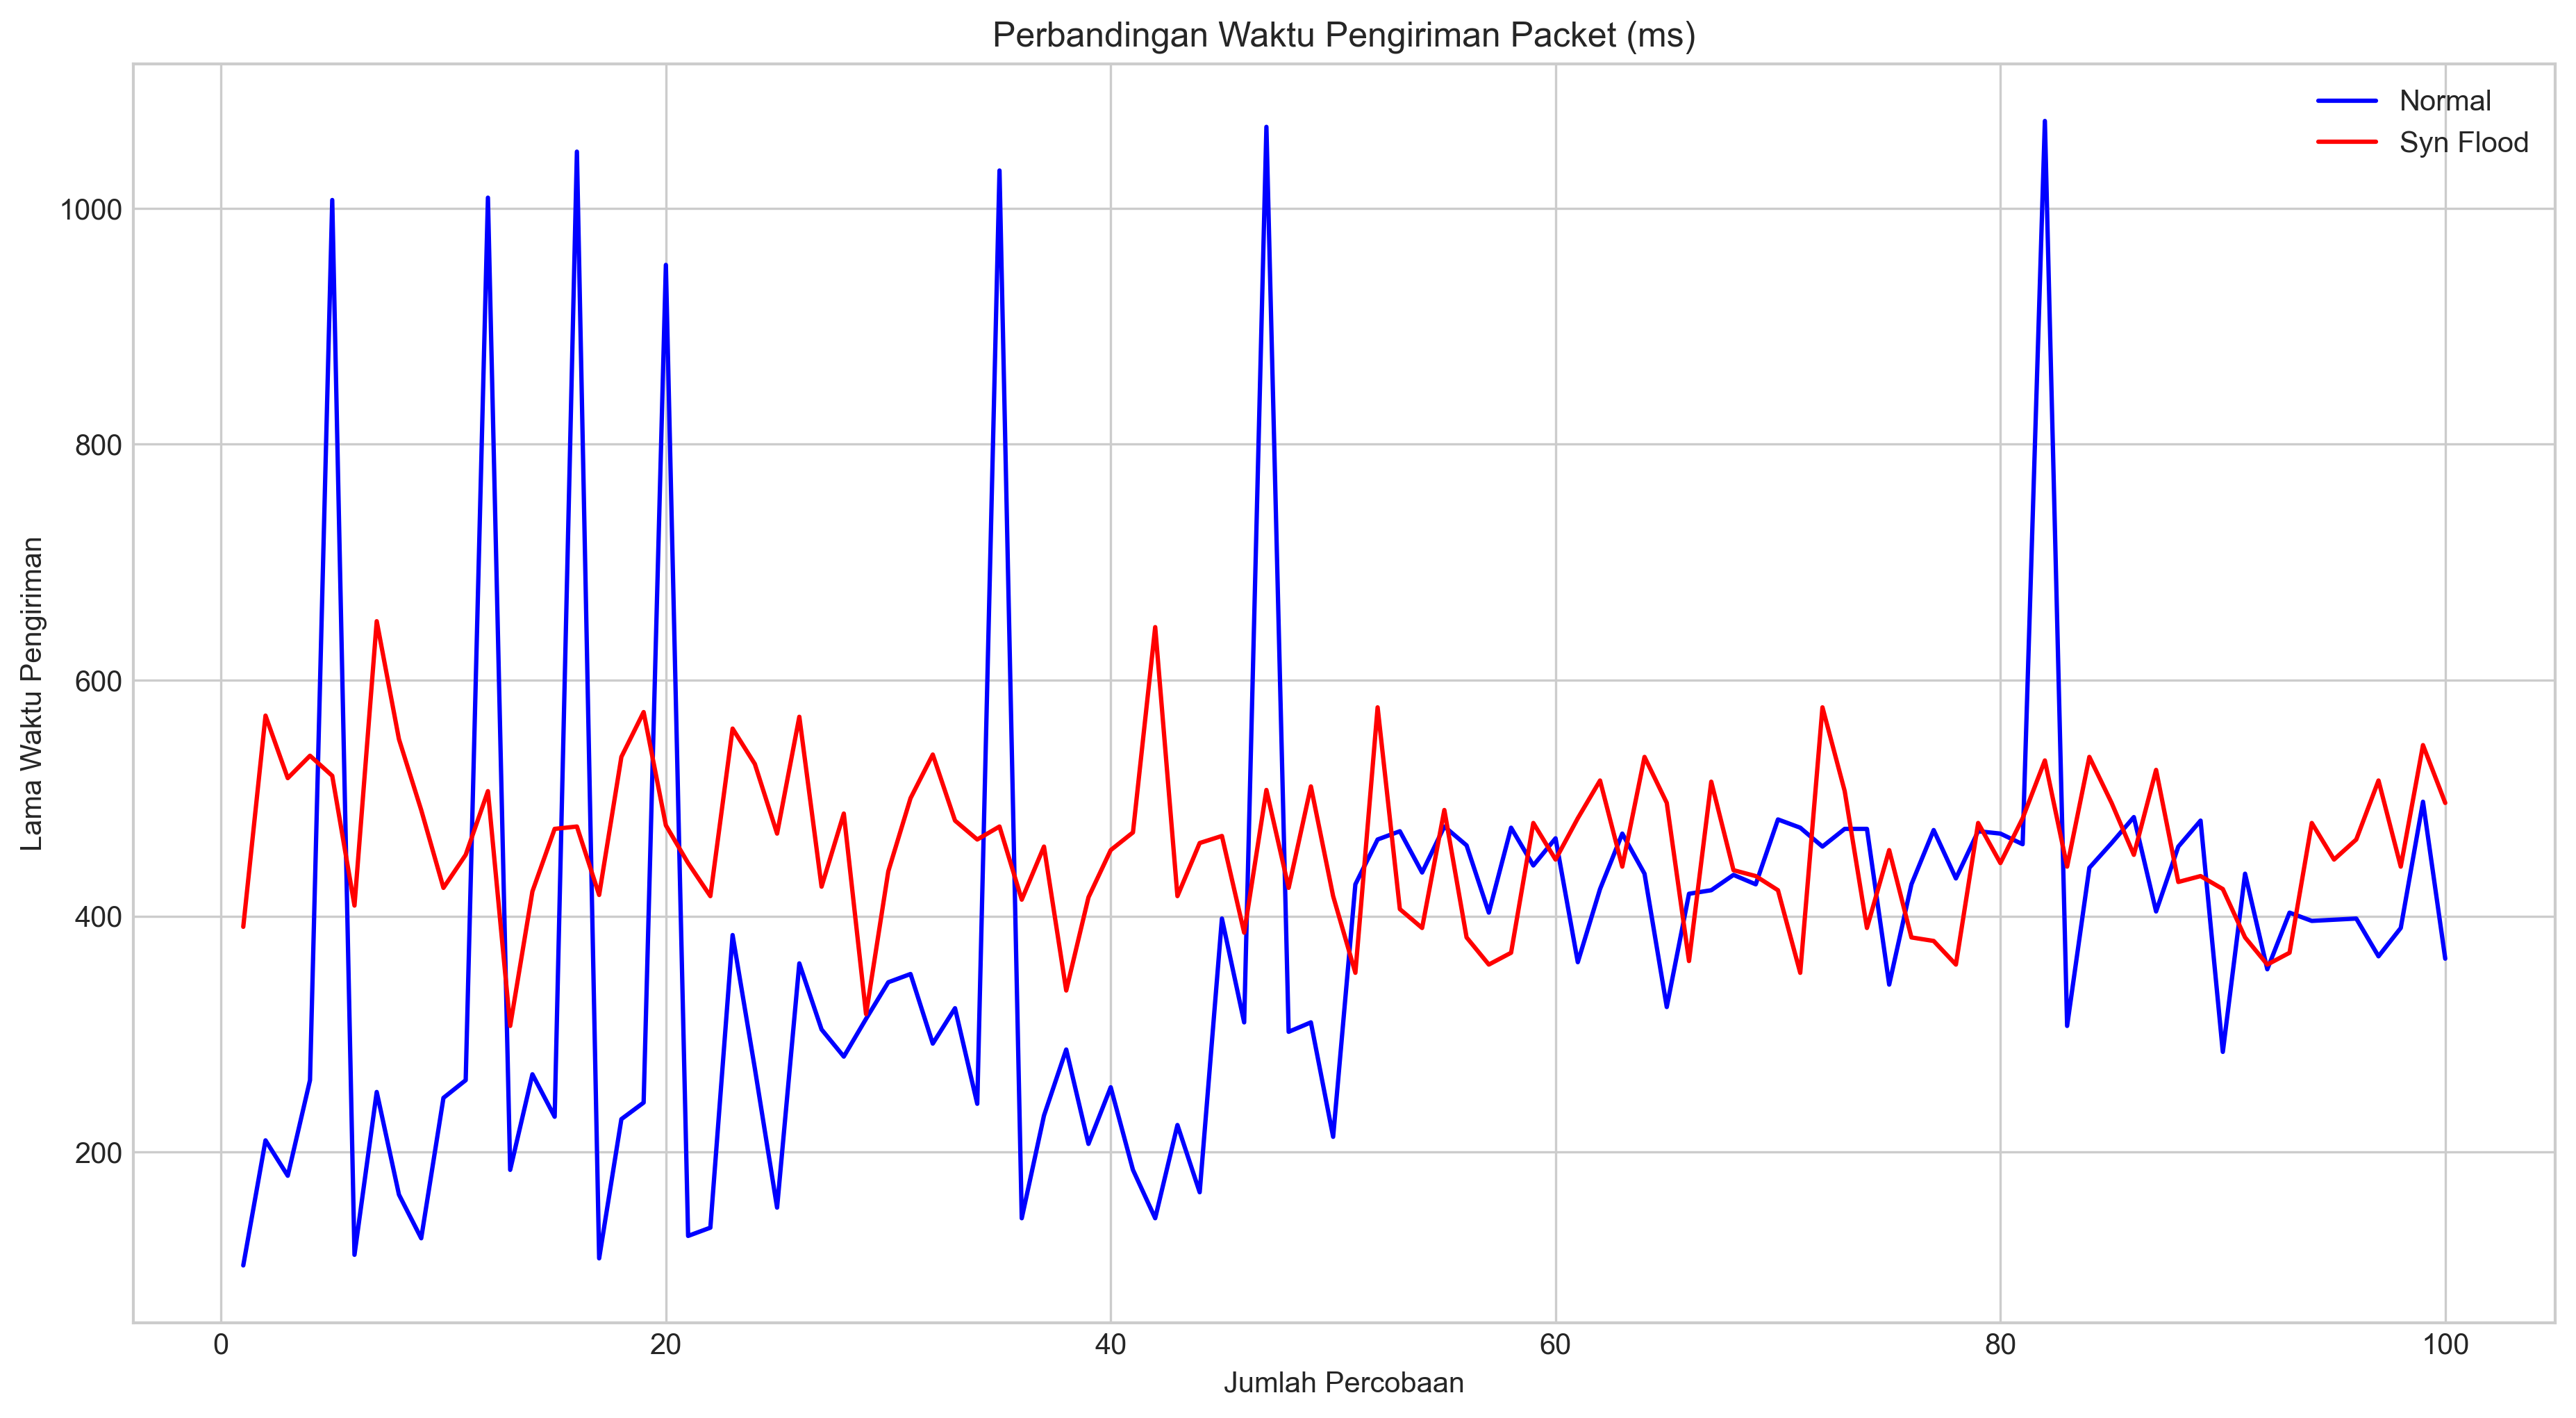

In [24]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
df_time.plot(kind='line',
            x='no',
            y=['time1', 'time2'],
            color=['blue', 'red'],
            ax=ax)
plt.xlabel('Jumlah Percobaan')
plt.ylabel('Lama Waktu Pengiriman')
plt.title('Perbandingan Waktu Pengiriman Packet (ms)')
plt.legend(['Normal','Syn Flood'])

## Receive

In [25]:
df_receive = pd.DataFrame({'no':df_bersih['no'], 'recv1':df_bersih['received'], 'recv2': df_flood['received']})

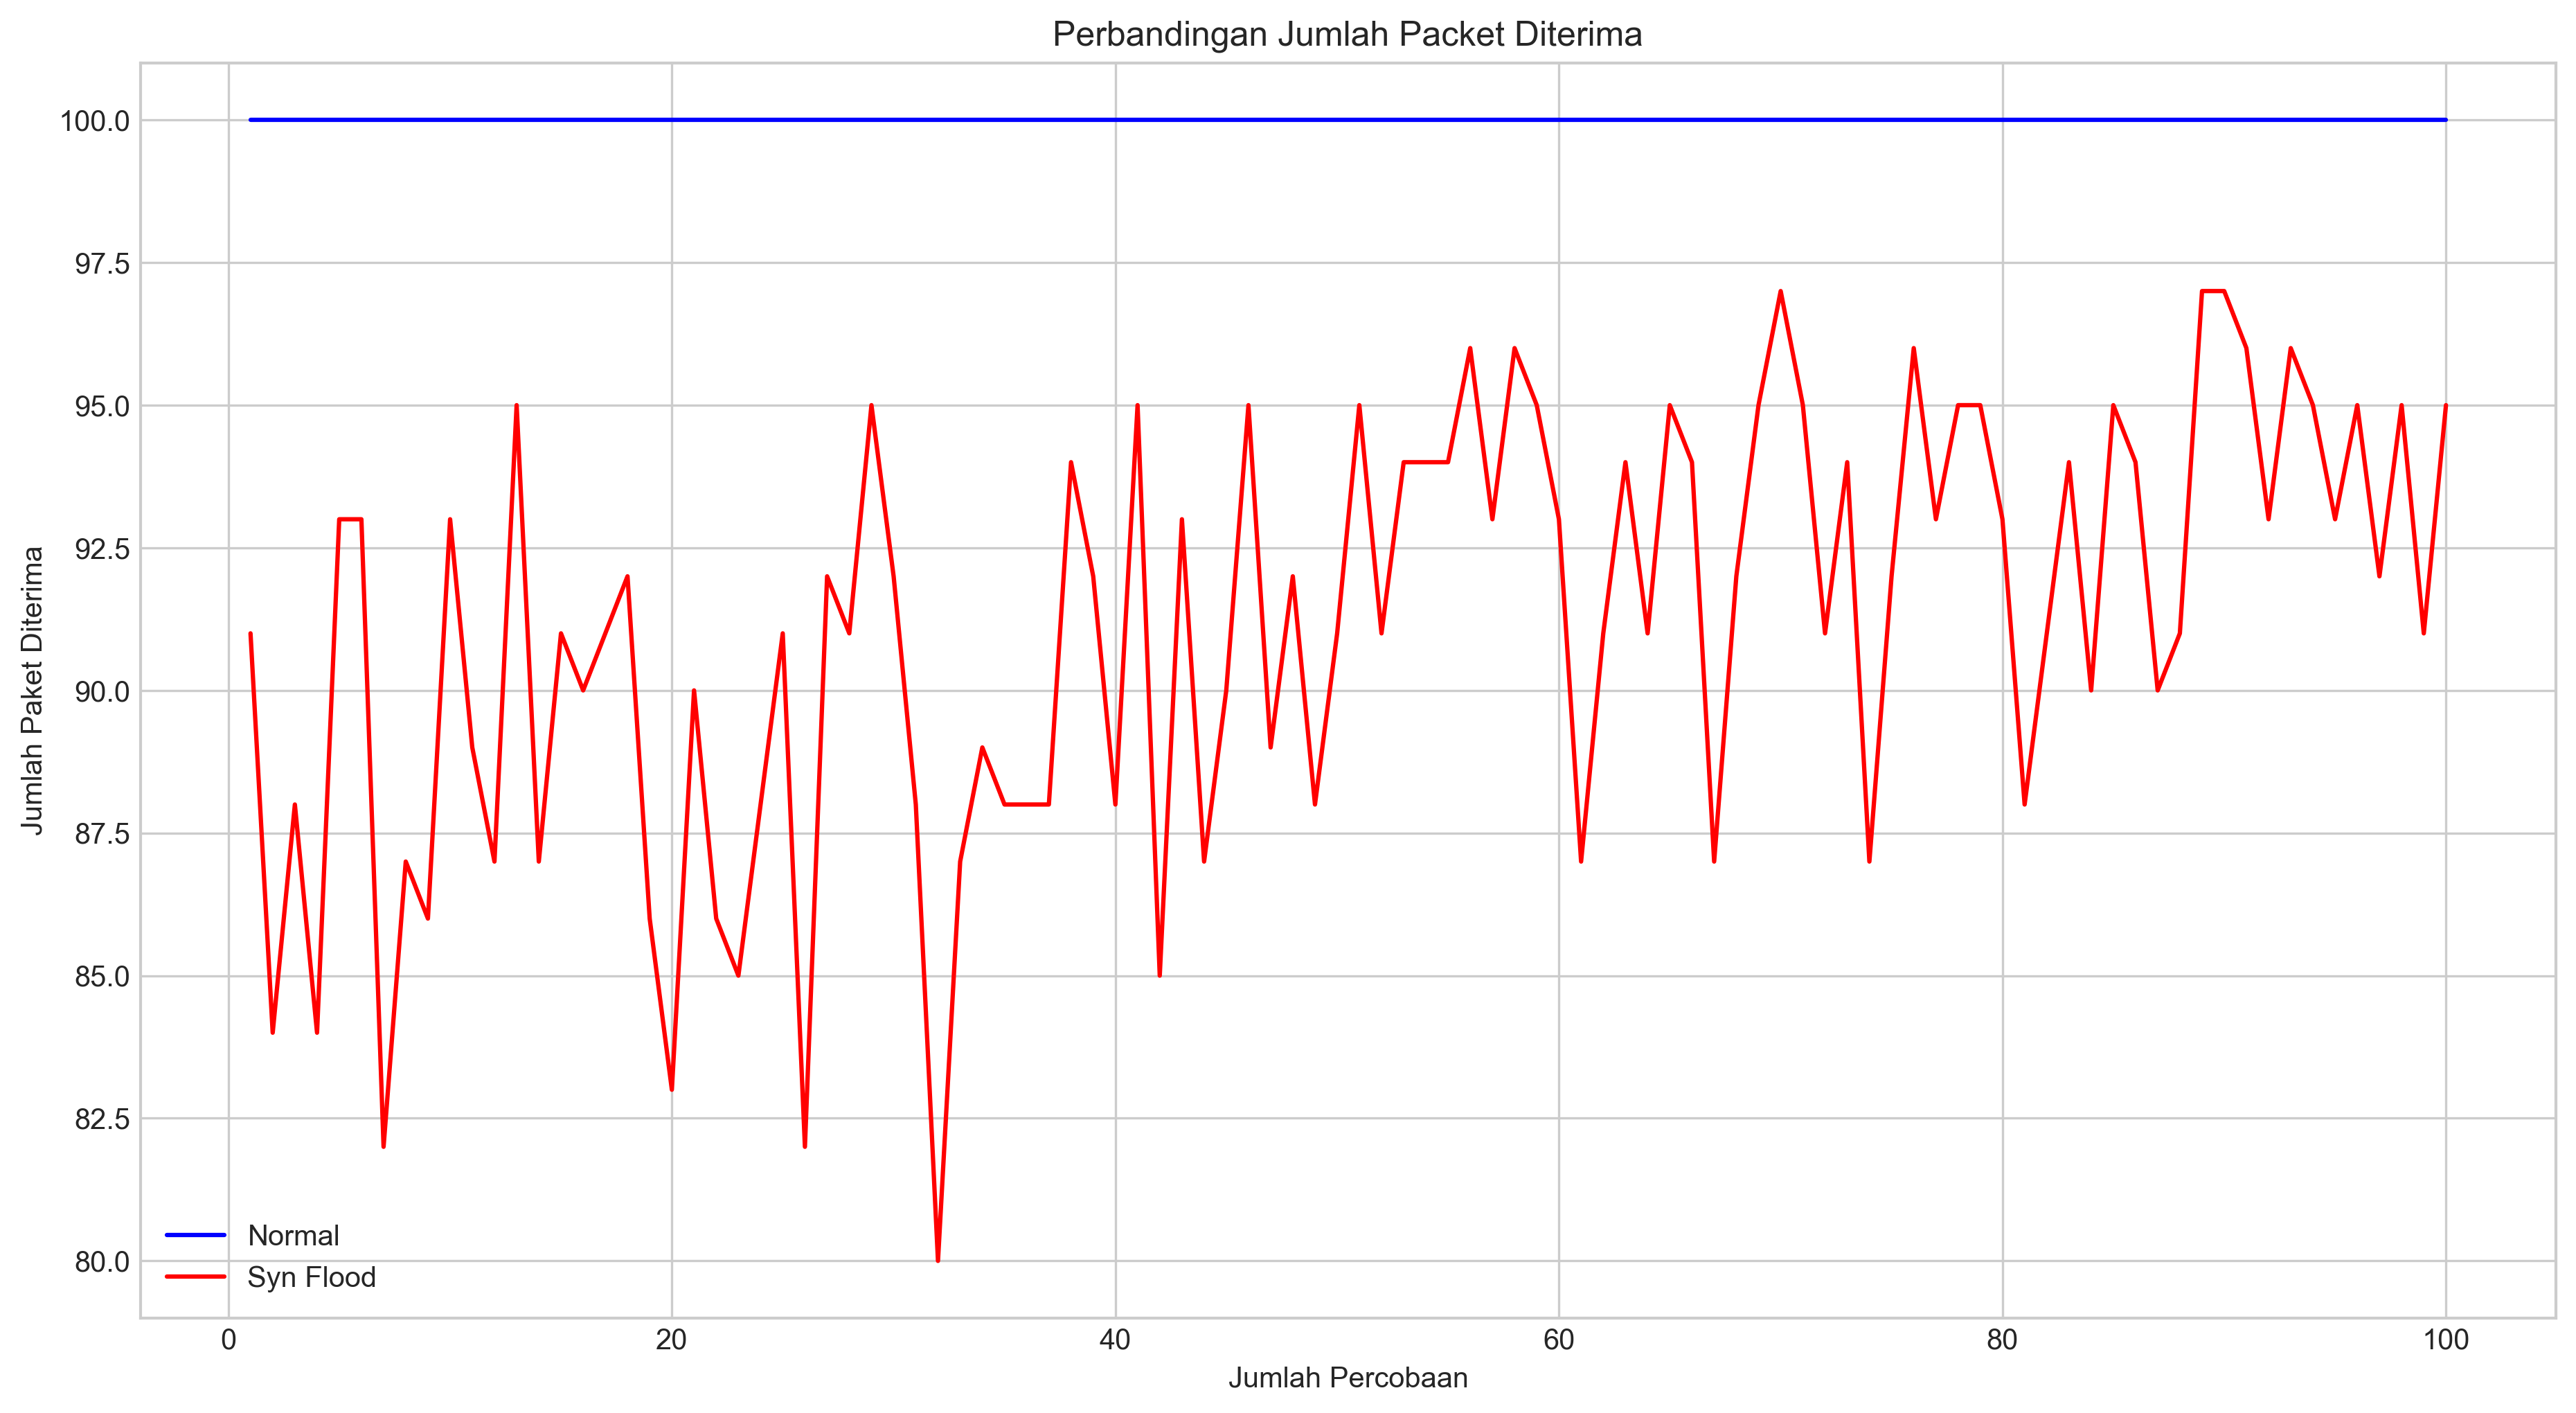

In [26]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
df_receive.plot(kind='line',
            x='no',
            y=['recv1', 'recv2'],
            color=['blue', 'red'],
            ax=ax)
plt.xlabel('Jumlah Percobaan')
plt.ylabel('Jumlah Paket Diterima')
plt.title('Perbandingan Jumlah Packet Diterima')
plt.legend(['Normal','Syn Flood'])

## Loss

In [27]:
df_loss = pd.DataFrame({'no':df_bersih['no'], 'loss1':df_bersih['loss'], 'loss2': df_flood['loss']})

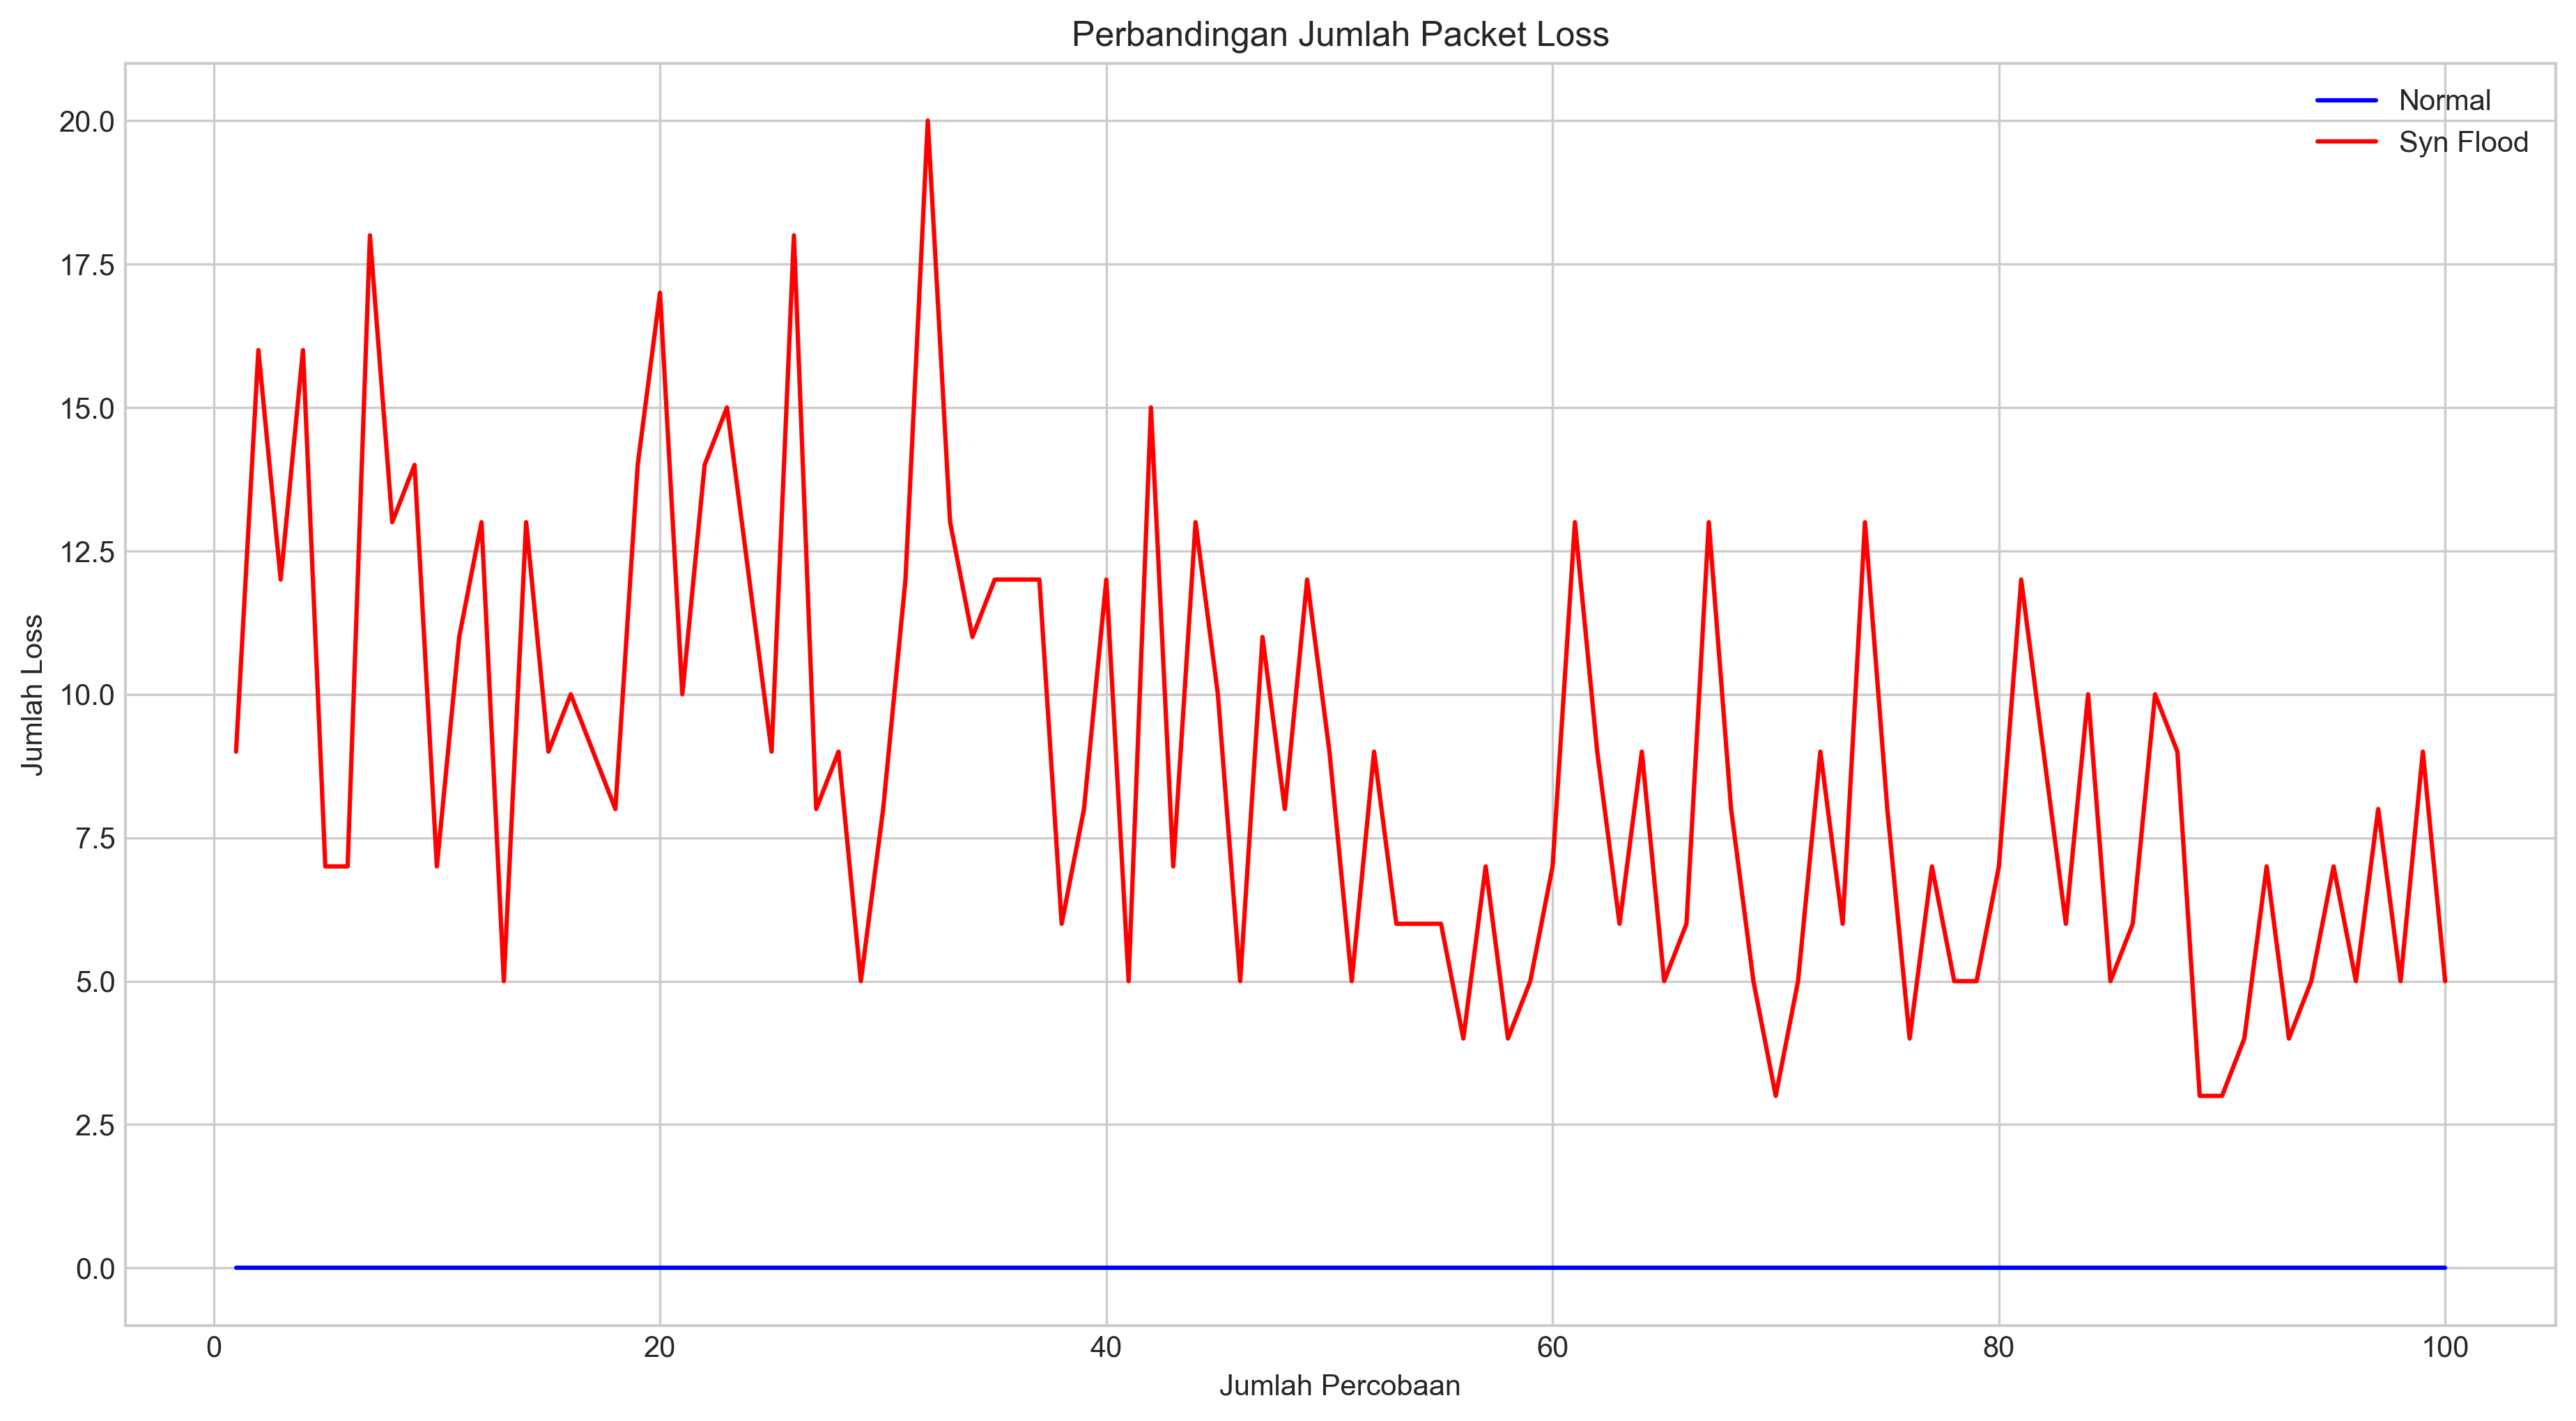

In [28]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
df_loss.plot(kind='line',
            x='no',
            y=['loss1', 'loss2'],
            color=['blue', 'red'],
            ax=ax)
plt.xlabel('Jumlah Percobaan')
plt.ylabel('Jumlah Loss')
plt.title('Perbandingan Jumlah Packet Loss')
plt.legend(['Normal','Syn Flood'])

## Describe

In [29]:
df_bersih['min'].mean()
df_flood['min'].mean()

0.3423799999999999

In [30]:
df1 = pd.DataFrame(dbersih.describe())
df2 = pd.DataFrame(dflood.describe())

# df1 = df1.reset_index()
# df1 = df1.rename(columns={'index': 'comparison'})
# df1.index += 1

# df2 = df2.reset_index()
# df2 = df2.rename(columns={'index': 'comparison'})
# df2.index += 1

In [31]:
df1.loc[['mean']]

,min,avg,max,mdev,transmitted,received,loss,time (ms)
mean,0.19357,0.37247,1.00301,0.1533,100.0,100.0,0.0,386.31


In [32]:
df2.loc[['mean']]

,min,avg,max,mdev,transmitted,received,loss,time (ms)
mean,0.34238,34.62194,57.89615,13.78468,100.0,91.14,8.86,460.68


In [33]:
df1_mean = df1.loc[['mean']]

In [34]:
df1_mean

,min,avg,max,mdev,transmitted,received,loss,time (ms)
mean,0.19357,0.37247,1.00301,0.1533,100.0,100.0,0.0,386.31


In [35]:
df2_mean = df2.loc[['mean']]

In [36]:
df2_mean

,min,avg,max,mdev,transmitted,received,loss,time (ms)
mean,0.34238,34.62194,57.89615,13.78468,100.0,91.14,8.86,460.68


In [37]:
frames = [df1_mean, df2_mean]

In [38]:
df_combine = pd.concat(frames)

In [39]:
df_combine

,min,avg,max,mdev,transmitted,received,loss,time (ms)
mean,0.19357,0.37247,1.00301,0.15330,100.0,100.00,0.00,386.31
mean,0.34238,34.62194,57.89615,13.78468,100.0,91.14,8.86,460.68


In [40]:
df_combine = df_combine.reset_index()
df_combine

,index,min,avg,max,mdev,transmitted,received,loss,time (ms)
0,mean,0.19357,0.37247,1.00301,0.15330,100.0,100.00,0.00,386.31
1,mean,0.34238,34.62194,57.89615,13.78468,100.0,91.14,8.86,460.68


In [41]:
df_combine = df_combine.drop('index', axis=1)

In [42]:
df_combine

,min,avg,max,mdev,transmitted,received,loss,time (ms)
0,0.19357,0.37247,1.00301,0.15330,100.0,100.00,0.00,386.31
1,0.34238,34.62194,57.89615,13.78468,100.0,91.14,8.86,460.68


In [43]:
df1_mean

,min,avg,max,mdev,transmitted,received,loss,time (ms)
mean,0.19357,0.37247,1.00301,0.1533,100.0,100.0,0.0,386.31


In [44]:
df2_mean

,min,avg,max,mdev,transmitted,received,loss,time (ms)
mean,0.34238,34.62194,57.89615,13.78468,100.0,91.14,8.86,460.68


In [45]:
df_compare = pd.DataFrame(df_combine.T)
df_compare.reset_index(inplace=True)

In [46]:
df_compare = df_compare.rename(columns={'index':'Perbandingan', 0:'normal', 1:'syn flood'})

In [47]:
df_compare

,Perbandingan,normal,syn flood
0,min,0.19357,0.34238
1,avg,0.37247,34.62194
2,max,1.00301,57.89615
3,mdev,0.15330,13.78468
4,transmitted,100.00000,100.00000
5,received,100.00000,91.14000
6,loss,0.00000,8.86000
7,time (ms),386.31000,460.68000


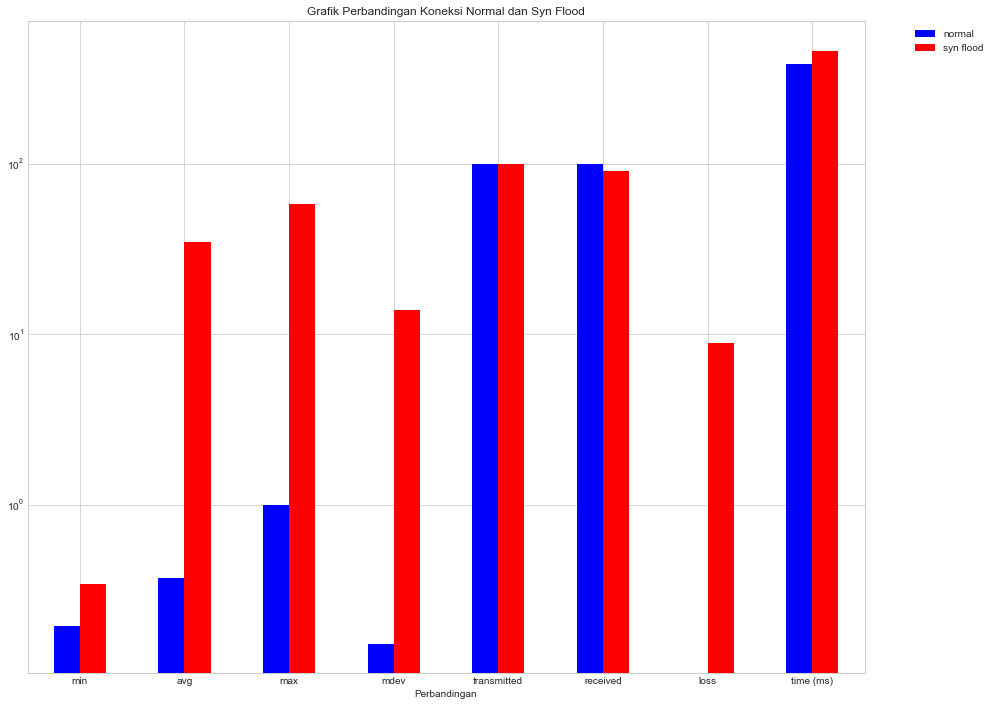

In [48]:
df_compare.plot.bar('Perbandingan', logy=True, figsize=(15,12), color=['blue', 'red'])
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Grafik Perbandingan Koneksi Normal dan Syn Flood')
plt.show()